In [1]:
import tweepy
import pandas as pd
import os
import unidecode
#import datetime
from datetime import timedelta, datetime 
from dateutil.relativedelta import relativedelta
import time
import datetime as dt 
import pymongo
from pymongo import MongoClient
import numpy as np
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_parquet('../Data/Trendings/2022-05-22/2022-05-22__#FedericoEsColombia.gzip')

In [41]:
df

,lang,author_id,id,created_at,text,conversation_id,in_reply_to_user_id,date,retweet_count,reply_count,like_count,quote_count,place_id,tweets_length,hashtags_length
0,es,965331540,1528328344261079040,2022-05-22 10:54:06+00:00,*Replicar en los grupos twitter y WhatsApp \n\...,1528328344261079040,NaN,2022-05-22T10:50:00Z,2608.0,336.0,3841.0,190.0,None,47,1
1,es,1355899138899111937,1528329250394210305,2022-05-22 10:57:42+00:00,Así es #FedericoEsColombia👇👇👇👇 https://t.co/UY...,1528329250394210305,NaN,2022-05-22T10:50:00Z,315.0,21.0,463.0,15.0,None,4,1
2,es,384586409,1528328671672553474,2022-05-22 10:55:24+00:00,Vamos con todaaa #FedericoEsColombia,1528328671672553474,NaN,2022-05-22T10:50:00Z,13.0,1.0,18.0,0.0,None,4,1
3,qht,884924503209455617,1528328968591507456,2022-05-22 10:56:35+00:00,#FedericoEsColombia https://t.co/dYyH0guIb0,1528328968591507456,NaN,2022-05-22T10:50:00Z,19.0,0.0,20.0,0.0,None,2,1
4,qht,142485126,1528329183692193792,2022-05-22 10:57:27+00:00,#FedericoEsColombia,1528329183692193792,NaN,2022-05-22T10:50:00Z,4.0,1.0,6.0,0.0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,qme,236187478,1528523863759507456,2022-05-22 23:51:02+00:00,@NEPTUNO92073415 @FicoGutierrez @petrogustavo ...,1528373380470169602,1.288623e+18,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None,4,1
7810,und,346706040,1528524900532727810,2022-05-22 23:55:09+00:00,@alejavillegasl #FedericoEsColombia 💗🇨🇴,1528508532114563073,1.668108e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None,3,1
7811,qht,149653751,1528525495238893569,2022-05-22 23:57:31+00:00,#FedericoEsColombia #22Mayo #Colombia #FelizDo...,1528525493502455808,1.496538e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None,13,13
7812,qme,1398677745178132484,1528524373631574018,2022-05-22 23:53:03+00:00,@jarizabaletaf #FedericoEsColombia \n#Federico...,1528483848656498688,9.653315e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None,8,8


In [5]:
df['tweets_length'] = df['text'].str.count(' ') + 1

In [40]:
df['hashtags_length'] = df['text'].str.count('#')

In [ ]:
df

<AxesSubplot:>

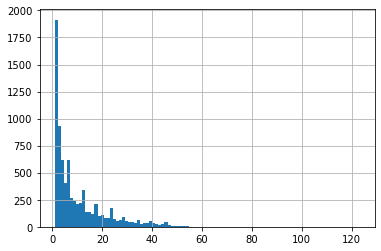

In [20]:
df['tweets_length'].hist(bins=100)

In [47]:
list(df[df['hashtags_length']> 3]['text'])

['#DelcyCabello @PGN_COL, #INDRA, #TibisayVega @Registraduria @CNE_COLOMBIA y @consejodeestado pondrán el presidente que les ordenó el #Anticristo #Farcsantos\n\n#FeEnLaCausa mi general @COMANDANTE_EJC\n#NosUnimosONosJodemos\n #FedericoEsColombia https://t.co/7oOO9swiZk',
 '@jarizabaletaf #FedericoEsColombia\n#FedericoEsColombia\n#FedericoEsColombia\n#FedericoEsColombia',
 '@jarizabaletaf #FedericoEsColombia\n#FedericoEsColombia\nBarranquilla, Cúcuta, Santa Marta, Montería.\n#FedericoEsColombia\n#FedericoEsColombia',
 '#DelcyCabello @PGN_COL, #INDRA, #TibisayVega @Registraduria @CNE_COLOMBIA y @consejodeestado pondrán el presidente que les ordenó el #Anticristo #Farcsantos\n\n#FeEnLaCausa mi general @COMANDANTE_EJC\n#NosUnimosONosJodemos\n #FedericoEsColombia #APOTEÓFICO!! https://t.co/FgyO7Mv3kI',
 '#FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #Federic